# Map projections

Coordinate reference systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates are related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees). This transformation is used to represent the three dimensional earth on a flat, two dimensional map.

As the CRS in different spatial datasets differ fairly often (i.e. one might have coordinates defined in decimal degrees while the other one has them in meters), it is a common procedure to redefine (or reproject) the CRS to be identical in both layers. It is important that the layers have the same coordinate reference system as it makes it possible to analyze the spatial relationships between the layers, such as conduct a Point in Polygon -query.

Choosing an appropriate projection for your map is not always straightforward because it depends on what you actually want to represent with your map, and what is the spatial scale of your data. In fact, there does not exist a "perfect projection" since each one of them has some strengths and weaknesses, and you should choose such projection that fits best for your needs. In fact, the projection you choose might even tell something about you:
    
![](img/Map-projections.png)
*Source: XKCD, See a full comic about ["What your favorite map projection tells about you"](https://xkcd.com/977/)*.

For those of you who want a bit more analytical approach for choosing the projection, you can get a good overview from [georeference.org](http://www.georeference.org/doc/guide_to_selecting_map_projections.htm), or from this blog post introducing [the strengths and weaknesses of a few commonly used projections](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/).

## Coordinate reference system (CRS) in Geopandas

Luckily, defining and changing projections is easy in Geopandas. In this tutorial we will see how to retrieve the
coordinate reference system information from the data, and how to change it. We will re-project a data file from
WGS84 (lat, lon coordinates) into a Lambert Azimuthal Equal Area projection which is the [recommended projection for
Europe](http://mapref.org/LinkedDocuments/MapProjectionsForEurope-EUR-20120.pdf) by European Commission.

For this tutorial we will be using a Shapefile called `Europe_borders.shp` representing the country borders in Europe, that you already should have [downloaded during the previous tutorial](geopandas-basics.ipynb). 

Shapefile should always contain information about the coordinate reference system that is stored in `.prj` -file (at least if the data has been appropriately produced). When reading the data into `GeoDataFrame` with Geopandas this information is automatically stored into `.crs` attribute of the GeoDataFrame.

- Let's start by reading the data from the `Europe_borders.shp` file and checking the `crs`:

In [1]:
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "data/Europe_borders.shp"
data = gpd.read_file(fp)

# Check the coordinate reference system
data.crs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


As we can see, here, the `crs` is a Python dictionary with a key `init` that has a value `epsg:4326`. This is a very typical way how CRS is stored in GeoDataFrames. There is also another typical way of representing the coordinate reference system, namely storing that information in [Proj4-string](https://proj4.org/usage/quickstart.html) format (we will come back to this later). 

The EPSG number (*"European Petroleum Survey Group"*) is a code that tells about the coordinate system of the dataset. "[EPSG Geodetic Parameter Dataset](http://www.epsg.org/) is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application". EPSG code `4326` that we have here, belongs to the WGS84 coordinate system (i.e. coordinates are in decimal degrees: latitudes and longitudes).

You can find a lot of information and lists of available coordinate reference systems from:

  - [www.spatialreference.org](http://spatialreference.org/)
  - [www.proj4.org](https://proj4.org/operations/projections/)
  - [www.mapref.org](http://mapref.org/CollectionofCRSinEurope.html)

- Let's continue by checking the values in our `geometry` -column to verify that the CRS of our GeoDataFrame seems correct:

In [2]:
data['geometry'].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

As we can see, the coordinate values of the Polygons indeed look like latitude and longitude values, so everything seems to be in order (as in most cases).

WGS84 projection is not really a good one for representing European borders, so let's convert those geometries into Lambert Azimuthal Equal Area projection ([EPSG: 3035](http://spatialreference.org/ref/epsg/etrs89-etrs-laea/)) which is the recommended projection by European Comission.

Changing the projection is simple to [do in Geopandas](http://geopandas.org/projections.html#re-projecting) with `.to_crs()` -function which is a built-in function of the GeoDataFrame. The function has two alternative parameters 1) `crs` and 2) `epgs` that can be used to make the coordinate transformation and re-project the data into the CRS that you want to use. 

- Let's re-project our data into `EPSG 3035` using `epsg` -parameter:

In [5]:
# Let's make a copy of our data
orig = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
print(data['geometry'].head())

#now in in a distance 

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


And here we go, the coordinate values in the geometries have changed! Now we have successfully changed the projection of our layer into a new one, i.e. to `ETRS-LAEA` projection. 

To really understand what is going on, it is good to explore our data visually. Hence, let's compare the datasets by making
maps out of them.


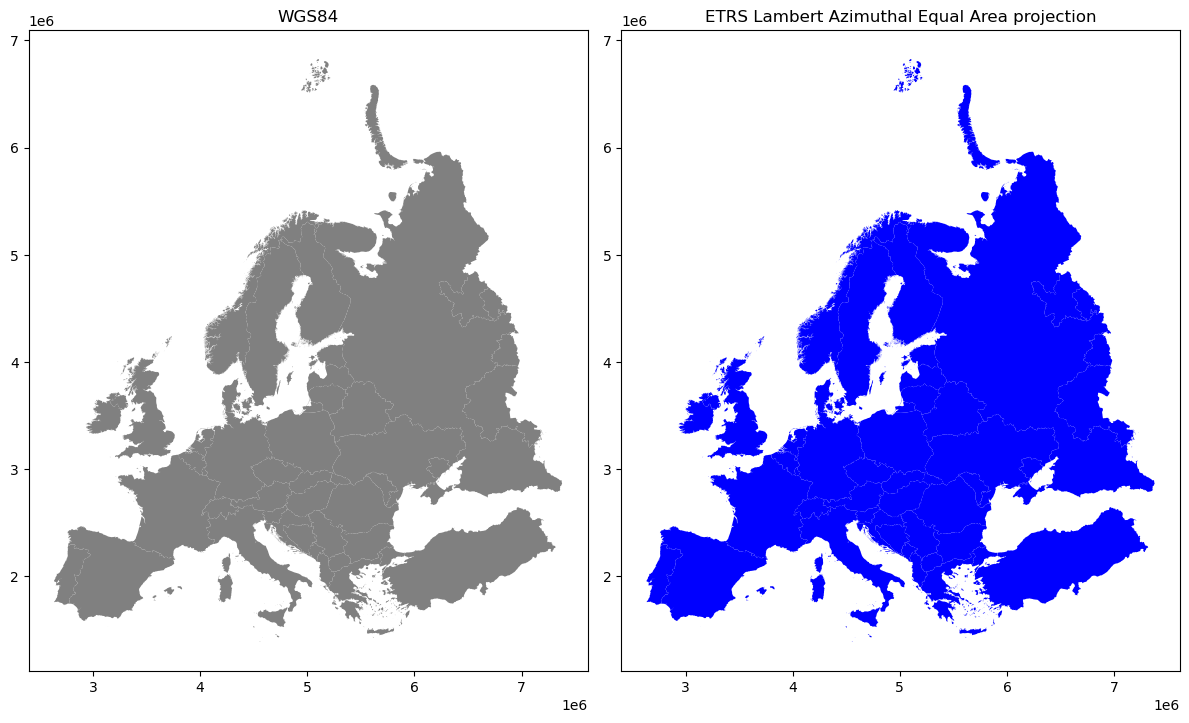

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

Indeed, the maps look quite different, and the re-projected one looks much better in Europe as the areas especially in the north are more realistic and not so stretched as in WGS84.

- Finally, let's save our projected layer into a Shapefile so that we can use it later.

In [7]:
# Ouput filepath
outfp = "data/Europe_borders_epsg3035.shp"
    
# Save to disk
data.to_file(outfp)

**NOTICE:** On Windows, the `.prj` -file might **NOT** update with the new CRS value when saving to Shapefile. If this happens it is possible to fix the `prj` by passing the coordinate reference information as proj4-string. For this purpose a library called [PyCRS](https://github.com/karimbahgat/PyCRS) is a handy tool that makes passing the proj4-strings easy. PyCRS has functions `pycrs.parse.from_epsg_code()` and `.to_proj4()` that can be used to define the CRS as proj4-string format:

In [ ]:
# Import pycrs
import pycrs

# Define the crs for the GeoDataFrame as proj4-string
epsg_code = 3035
data.crs = pycrs.parse.from_epsg_code(epsg_code).to_proj4()

# Let's see what we have now
data.crs

As we can see, now the CRS of the GeoDataFrame is represented as [Proj4-string](https://proj4.org/usage/quickstart.html) that will be saved into the `.prj` -file when saving the GeoDataFrame into Shapefile. 

- Let's save the file once more:

In [ ]:
# Ouput filepath
outfp = "data/Europe_borders_epsg3035.shp"
    
# Save to disk
data.to_file(outfp)

The [PyCRS](https://github.com/karimbahgat/PyCRS) library is really useful as it contains information and supports many different coordinate reference definitions, such as OGC WKT (v1), ESRI WKT, Proj4, and any EPSG, ESRI, or SR-ORG code available from spatialreference.org.

## Calculating distances

Next, we will conduct a practical example, and continue working with the `Europe_borders.shp` -file. Our aim is to find the Euclidean distances from the centroids (midpoints) of all European countries to Helsinki, Finland. We will calculate the distance between Helsinki and other European countries using a metric projection ([Azimuthal Equidistant -projection](https://proj4.org/operations/projections/aeqd.html)) that gives us the distance in meters. Notice, that this projection is slightly less commonly used, but still useful to know. 

- Let's first create a GeoDataFrame that contains a single Point representing the location of Helsinki, Finland:

In [ ]:
# Import necessary modules
from shapely.geometry import Point
import pycrs

# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

# Create GeoDataFrame
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

# Print 
print(helsinki)

As we can see, it is possible to create a GeoDataFrame directly with one line of code. Notice that, here, we specified the CRS directly by passing the crs as Python dictionary `{'init': 'epsg:4326'}` which is one alternative way to define the CRS. We also told that the `geometry` information is stored in column called `'geometry'` that we actually define with parameter `columns=['geometry']`. 

Next, we need to convert this `GeoDataFrame` to "Azimuthal Equidistant" -projection that has useful properties because all points on the map in that projection are at proportionately correct distances from the center point (defined with parameters `lat_0` and `lon_0`), and all points on the map are at the correct direction from the center point. 

To conduct the transformation, we are going to utilize again a Proj4-string that we can obtain using another library concentrated for coordinate reference systems, called [pyproj](https://github.com/jswhit/pyproj). This package is useful when dealing with "special" projections such as the one demonstrated here.

 - We will create our Proj4-string by passing specific parameters to `Proj()` -object that are needed to construct the [Azimuthal Equidistant projection](https://proj4.org/operations/projections/aeqd.html):
    
    - `proj='aeqd'` refers to *projection specifier* that we determine to be Azimuthal Equidistant ('aeqd')
    - `ellps='WGS84'` refers to the [reference ellipsoid](https://en.wikipedia.org/wiki/Reference_ellipsoid) that is a mathematically modelled (based on measurements) surface that approximates the true shape of the world. World Geodetic System (WGS) was established in 1984, hence the name. 
    - `datum='WGS84'` refers to the [Geodetic datum](https://en.wikipedia.org/wiki/Geodetic_datum) that is a coordinate system constituted with a set of reference points that can be used to locate places on Earth.
    - `lat_0` is the latitude coordinate of the center point in the projection
    - `lon_0` is the longitude coordinate of the center point in the projection

In [ ]:
# Import pyproj
import pyproj

# Define the projection using the coordinates of our Helsinki point (hki_lat, hki_lon) as the center point
# The .srs here returns the Proj4-string presentation of the projection
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs

# Reproject to aeqd projection using Proj4-string
helsinki = helsinki.to_crs(crs=aeqd)

# Print the data
print(helsinki)

# Print the crs
print('\nCRS:\n', helsinki.crs)

As we can see the projection is indeed centered to Helsinki as the 0-position (in meters) in both x and y is defined now directly into the location where we defined Helsinki to be located (you'll understand soon better when seeing the map). 

Next we want to transform the `Europe_borders.shp` data into the desired projection. 

- Let's create a new copy of our GeoDataFrame into a variable called `europe_borders_aeqd`: 

In [ ]:
# Create a copy
europe_borders_aeqd = data.copy()

- Let's now reproject our Europer borders data into the Azimuthal Equidistant projection that was centered into Helsinki:

In [ ]:
# Reproject to aeqd projection that we defined earlier
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd)

# Print 
print(europe_borders_aeqd.head(2))

Okay, now we can see that the coordinates in `geometry` column are fairly large numbers as they represents the distance in meters from Helsinki to different directions. 

- Let's plot the Europe borders and the location of Helsinki to get a better understanding how our projection has worked out:

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
europe_borders_aeqd.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
helsinki.plot(ax=ax, color='black', markersize=10)

As we can see from the map, the projection is indeed centered to Helsinki as the 0-position of the x and y axis is located where Helsinki is positioned. Now the coordinate values are showing the distance from Helsinki (black point) to different directions (South, North, East and West) in meters. 



Next, our goal is to calculate the distance from all countries to Helsinki. To be able to do that, we need to calculate the centroids for all the Polygons representing the boundaries of European countries. 

- This can be done easily in Geopandas by using the `centroid` attribute:

In [ ]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid
print(europe_borders_aeqd.head(2))

Now we have created a new column called `centroid` that has the Point geometries representing the centroids of each Polygon (in Azimuthal Equidistant projection).

Next, we will calculate the distances between the country centroids and Helsinki. For doing this, we could use `iterrows()` -function that we have used earlier, but here we will demonstrate a more efficient (faster) technique to go through all rows in (Geo)DataFrame by using `apply()` -function. 

The [apply()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) -function can give a big boost in performance over the `iterrows()` and it is the recommendable way of iterating over the rows in (Geo)DataFrames. Here, we will see how to use that to calculate the distance between the centroids and Helsinki. 

 - First, we will create a dedicated function for calculating the distances called `calculate_distance()`:

In [ ]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

Here, the parameter `row` is used to pass the data from each row of our GeoDataFrame into the function. Other paramaters are used for passing other necessary information for using our function.

- Before using our function and calculating the distances between Helsinki and centroids, we need to get the Shapely point geometry from the re-projected Helsinki center point that we can pass to our function (into the `dest_geom` -parameter. We can use the `loc` -functionality to retrieve the value from specific index and column:

In [ ]:
# Retrieve the geometry from Helsinki GeoDataFrame
helsinki_geom = helsinki.loc[0, 'geometry']
print(helsinki_geom)

Now we are ready to use our function with `apply()`. When using the function, it is important to specify the direction of iteration that should be in our case specified with `axis=1`. This ensures that the calculations are done row by row (instead of column-wise).
  
  - When iterating over a DataFrame or GeoDataFrame, apply function is used by following the format `GeoDataFrame.apply(name_of_your_function, param1, param2, param3,  axis=1)`
  
    - Notice that the first parameter is always the name of the function that you want to use **WITHOUT** the parentheses. This will start the iteration using the function you have created, and the values of the row will be inserted into the `row` parameter / attribute inside the function (see above). 

In [ ]:
# Calculate the distances using our custom function called 'calculate_distance'
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, dest_geom=helsinki_geom, src_col='centroid', target_col='dist_to_Hki', axis=1)
print(europe_borders_aeqd.head(10))

Great! Now we have successfully calculated the distances between the Polygon centroids and Helsinki. 😎

- Let's check what is the longest and mean distance to Helsinki from the centroids of other European countries:

In [ ]:
# Calculat the maximum and average distance
max_dist = europe_borders_aeqd['dist_to_Hki'].max()
mean_dist = europe_borders_aeqd['dist_to_Hki'].mean()

print("Maximum distance to Helsinki is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

As we can see, the finns living in the North are fairly far away from all other European countries, as the mean distance to other countries is 1185 kilometers. 

Notice: If you would like to calculate distances between multiple locations across the globe, it is recommended to use [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) to do the calculations. [Haversine](https://github.com/mapado/haversine) package in Python provides an easy-to-use function for calculating these
   based on latitude and longitude values.

## Summary 

During this tutorial we have seen how to 

**1)** define the coordinate reference system with a few different approaches, mainly by:

 - specifying the coordinate reference system with crs dictionary e.g. `{'init': 'epsg:4326'}`
 - specifying CRS with Proj4-string using PyCRS library: `pycrs.parser.from_epsg_code(4326).to_proj4()`
 - specifying slightly less common CRS (Azimuthal Equidistant) with Proj4-string using pyproj library: `pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs`
 - A fourth option that was not covered in the materials is to use a library called `fiona` and its function `from_epsg()`. See documentation about this from [here](http://toblerity.org/fiona/manual.html#format-drivers-crs-bounds-and-schema) if you are interested. We also quickly introduced this in the [previous tutorial](geopandas-basics.ipynb).
 
**2)** reproject (transform) the geometries from crs to another using the `to_crs()` -function in GeoPandas

**3)** calculate distances between locations and using `apply()` -function to iterate over rows more efficiently than using `iterrows()`. 